# Import Packages

In [231]:

import  numpy as np
import pandas as pd

import matplotlib.colors as mcol
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation

import seaborn as sns

import time 
import os

import glob
import csv


In [232]:
plt.rcParams['figure.figsize'] = [9, 6]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.style.use('default')

# Read Sim Data

## Read Sim Data Function

In [233]:
def preprocessSimData(df, desiredStates:list, initialIndex:int=300, finalIndex:int=812):
    '''
    Preprocess text file (fixing formatting issue in data as well) while returning a dataframe object with the desired states selected

    Parameters:
    -----------
    df: dataFrame
        Panda dataframe that is read from one of the recorded simulation .txt files
    desiredStates: list
        List of desired states to return as a panda dataframe object in sequential order

    Return:
    ----------
    stateMatrix: dataFrame
        State matrix with desired states
    '''



    # Fix formatting Variables
    falseList = ['time_lf_hip_joint_position', 'lf_lower_leg_joint_position', 'lf_upper_leg_joint_position', 'lh_hip_joint_position', 'lh_lower_leg_joint_position', 'lh_upper_leg_joint_position',
                'rf_hip_joint_position', 'rf_lower_leg_joint_position', 'rf_upper_leg_joint_position', 'rh_hip_joint_position', 'rh_lower_leg_joint_position', 'rh_upper_leg_joint_position',
                'lf_hip_joint_vel', 'lf_lower_leg_joint_vel', 'lf_upper_leg_joint_vel', 'lh_hip_joint_vel', 'lh_lower_leg_joint_vel', 'lh_upper_leg_joint_vel',
                'rf_hip_joint_vel', 'rf_lower_leg_joint_vel', 'rf_upper_leg_joint_vel', 'rh_hip_joint_vel', 'rh_lower_leg_joint_vel', 'rh_upper_leg_joint_vel',
                'lf_hip_joint_effort', 'lf_lower_leg_joint_effort', 'lf_upper_leg_joint_effort', 'lh_hip_joint_effort', 'lh_lower_leg_joint_effort', 'lh_upper_leg_joint_effort',
                'rf_hip_joint_effort', 'rf_lower_leg_joint_effort', 'rf_upper_leg_joint_effort', 'rh_hip_joint_effort', 'rh_lower_leg_joint_effort', 'rh_upper_leg_joint_effort', 'nan']
    df.columns = falseList
    df['time_lf_hip_joint_position'] = df.time_lf_hip_joint_position.str[0:8] + ' ' + df.time_lf_hip_joint_position.str[8:]


    # Data and State Name List
    data = df.values # np array of data values
    namesList = ['time', 'lf_hip_joint_position', 'lf_lower_leg_joint_position', 'lf_upper_leg_joint_position', 'lh_hip_joint_position', 'lh_lower_leg_joint_position', 'lh_upper_leg_joint_position',
                'rf_hip_joint_position', 'rf_lower_leg_joint_position', 'rf_upper_leg_joint_position', 'rh_hip_joint_position', 'rh_lower_leg_joint_position', 'rh_upper_leg_joint_position',
                'lf_hip_joint_vel', 'lf_lower_leg_joint_vel', 'lf_upper_leg_joint_vel', 'lh_hip_joint_vel', 'lh_lower_leg_joint_vel', 'lh_upper_leg_joint_vel',
                'rf_hip_joint_vel', 'rf_lower_leg_joint_vel', 'rf_upper_leg_joint_vel', 'rh_hip_joint_vel', 'rh_lower_leg_joint_vel', 'rh_upper_leg_joint_vel',
                'lf_hip_joint_effort', 'lf_lower_leg_joint_effort', 'lf_upper_leg_joint_effort', 'lh_hip_joint_effort', 'lh_lower_leg_joint_effort', 'lh_upper_leg_joint_effort',
                'rf_hip_joint_effort', 'rf_lower_leg_joint_effort', 'rf_upper_leg_joint_effort', 'rh_hip_joint_effort', 'rh_lower_leg_joint_effort', 'rh_upper_leg_joint_effort']

    dictStates = {}
    staticCounter = 0 # Variable to account for formatting issue
    for index in range(len(namesList)-1):
        if index == 0 and staticCounter == 0: # Condition for formatting issue of collected data
            for j in range(len(data[:,index])): # Looping through all elements in column 0 and converting to float
                if j == 0: # Initialize array
                    array1 = float(data[j,index][0:8])
                    #print(array1)
                    array2 = float(data[j,index][8:])
                    #print(array2)
                else:
                    array1 = np.vstack((array1,float(data[j,index][0:8])))
                    array2 = np.vstack((array2,float(data[j,index][8:])))
            dictStates[namesList[index]] = np.squeeze(array1[initialIndex:finalIndex])
            dictStates[namesList[index+1]] = np.squeeze(array2[initialIndex:finalIndex])        
        else:
            dictStates[namesList[index+1]] = data[initialIndex:finalIndex,index]
    for counter, names in enumerate(desiredStates):
        if counter == 0:
            stateMatrix = np.reshape(dictStates[names], (-1,1))
        else:
            stateMatrix = np.hstack((stateMatrix, np.reshape(dictStates[names], (-1,1))))
    return pd.DataFrame(stateMatrix, columns = desiredStates)



def preprocessFile(fileNames:list, initialIndex:int, finalIndex:int, desiredStates:list):
    '''
    Given fileNames to read, reads the file(s) and returns all data concatenated in a panda dataframe framework

    Paramaters:
    -----------
    fileNamess:list
        List of filenames to read and concatenate data together
    intialIndex: int
        Index to start reading each file's data from
    finalIndex: int
        Index to stop reading each file's data from
    desiredStates:list
        List of states to read
    
    Return:
    ----------
    totalData: dataFrame
        Returns data of all filenames with given states in one panda dataframe
    '''

    filePaths = []
    for i in fileNames:
        filePaths.append(glob.glob(i))


    #print(filePaths)

    dataFrameList = []
    for i in filePaths:
        for j in i:
            df = pd.read_csv(j, sep= " ", header=None)
            dataFrameList.append(preprocessSimData(df, desiredStates, initialIndex=initialIndex, finalIndex=finalIndex)) # 712-200 = 512 --> 512-1 is 512 indices (i.e. [0, 511])

    totalData = pd.concat(dataFrameList)
    return totalData

## Read Data

In [234]:
# List of states
namesList = ['time', 'lf_hip_joint_position', 'lf_lower_leg_joint_position', 'lf_upper_leg_joint_position', 'lh_hip_joint_position', 'lh_lower_leg_joint_position', 'lh_upper_leg_joint_position',
                'rf_hip_joint_position', 'rf_lower_leg_joint_position', 'rf_upper_leg_joint_position', 'rh_hip_joint_position', 'rh_lower_leg_joint_position', 'rh_upper_leg_joint_position',
                'lf_hip_joint_vel', 'lf_lower_leg_joint_vel', 'lf_upper_leg_joint_vel', 'lh_hip_joint_vel', 'lh_lower_leg_joint_vel', 'lh_upper_leg_joint_vel',
                'rf_hip_joint_vel', 'rf_lower_leg_joint_vel', 'rf_upper_leg_joint_vel', 'rh_hip_joint_vel', 'rh_lower_leg_joint_vel', 'rh_upper_leg_joint_vel',
                'lf_hip_joint_effort', 'lf_lower_leg_joint_effort', 'lf_upper_leg_joint_effort', 'lh_hip_joint_effort', 'lh_lower_leg_joint_effort', 'lh_upper_leg_joint_effort',
                'rf_hip_joint_effort', 'rf_lower_leg_joint_effort', 'rf_upper_leg_joint_effort', 'rh_hip_joint_effort', 'rh_lower_leg_joint_effort', 'rh_upper_leg_joint_effort']


In [235]:
desiredStates = ['lf_hip_joint_position', 'lf_hip_joint_vel', 'lf_lower_leg_joint_position', 
                'lf_lower_leg_joint_vel', 'lf_hip_joint_effort', 'lf_lower_leg_joint_effort']

filePath = "simData"

# Read champ states for forward gait
fileNames_1_f = [filePath + '/empty_world_ground/joint_state_test_forward_0.1*']
fileNames_2_f = [filePath + '/empty_world_ground/joint_state_test_forward_0.2*']
fileNames_3_f = [filePath + '/empty_world_ground/joint_state_test_forward_0.3*']
fileNames_4_f = [filePath + '/empty_world_ground/joint_state_test_forward_0.4*']
fileNames_5_f = [filePath + '/empty_world_ground/joint_state_test_forward_0.5*']
fileNames_6_f = [filePath + '/empty_world_ground/joint_state_test_forward_0.6*']
fileNames_7_f = [filePath + '/empty_world_ground/joint_state_test_forward_0.7*']

# Read champ states for right gait
fileNames_1_r = [filePath + '/empty_world_ground/joint_state_test_right_0.1*']
# Read champ states for left gait
fileNames_1_l = [filePath + '/empty_world_ground/joint_state_test_left_0.1*']
# Read champ states for backward gait
fileNames_1_b = [filePath + '/empty_world_ground/joint_state_test_backward_0.1*']

initialIndex, finalIndex= 0, 9000


In [236]:
# Read champ states on varying kp ground param
fileNames_1_f_kp_100e6_kd_0 = [filePath + '/plane_kp_100e6_kd_0/joint_state_test_plane_kp_100e6_kd_0_forward_0.1*']
fileNames_1_f_kp_100e8_kd_0 = [filePath + '/plane_kp_100e8_kd_0/joint_state_test_plane_kp_100e8_kd_0_forward_0.1*']
fileNames_1_f_kp_100e10_kd_0 = [filePath + '/plane_kp_100e10_kd_0/joint_state_test_plane_kp_100e10_kd_0_forward_0.1*']

# Read champ states on different kd ground param
fileNames_1_f_kp_100e10_kd_100 = [filePath + '/plane_kp_100e10_kd_100/joint_state_test_plane_kp_100e10_kd_100_forward_0.1*']
fileNames_1_f_kp_100e10_kd_250 = [filePath + '/plane_kp_100e10_kd_250/joint_state_test_plane_kp_100e10_kd_250_forward_0.1*']
fileNames_1_f_kp_100e10_kd_500 = [filePath + '/plane_kp_100e10_kd_500/joint_state_test_plane_kp_100e10_kd_500_forward_0.1*']

# Read champ states on different terrain
fileNames_1_f_ramp_kp_100e10_kd_100 = [filePath + '/ramp2Deg_kp_100e10_kd_100/joint_state_test_rampWorld_forward_0.1*']

In [237]:
# Get panda dataframe from all listed files
emptyWorldFrame_1_f = preprocessFile(fileNames_1_f,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_2_f = preprocessFile(fileNames_2_f,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_3_f = preprocessFile(fileNames_3_f,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_4_f = preprocessFile(fileNames_4_f,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_5_f = preprocessFile(fileNames_5_f,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_6_f = preprocessFile(fileNames_6_f,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_7_f = preprocessFile(fileNames_7_f,initialIndex,finalIndex, desiredStates)

emptyWorldFrame_1_r = preprocessFile(fileNames_1_r,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_1_l = preprocessFile(fileNames_1_l,initialIndex,finalIndex, desiredStates)
emptyWorldFrame_1_b = preprocessFile(fileNames_1_b,initialIndex,finalIndex, desiredStates)


kp_100e6_kd_0_Frame_1_f = preprocessFile(fileNames_1_f_kp_100e6_kd_0, initialIndex, finalIndex, desiredStates)
kp_100e8_kd_0_Frame_1_f = preprocessFile(fileNames_1_f_kp_100e8_kd_0, initialIndex, finalIndex, desiredStates)
kp_100e10_kd_0_Frame_1_f = preprocessFile(fileNames_1_f_kp_100e10_kd_0, initialIndex, finalIndex, desiredStates)

kp_100e10_kd_100_Frame_1_f = preprocessFile(fileNames_1_f_kp_100e10_kd_100, initialIndex, finalIndex, desiredStates)
kp_100e10_kd_250_Frame_1_f = preprocessFile(fileNames_1_f_kp_100e10_kd_250, initialIndex, finalIndex, desiredStates)
kp_100e10_kd_500_Frame_1_f = preprocessFile(fileNames_1_f_kp_100e10_kd_500, initialIndex, finalIndex, desiredStates)

ramp_kp_100e10_kd_100_Frame_1_f = preprocessFile(fileNames_1_f_ramp_kp_100e10_kd_100, initialIndex, finalIndex, desiredStates)
# Printing out dataframe
emptyWorldFrame_2_f.head(5)

,lf_hip_joint_position,lf_hip_joint_vel,lf_lower_leg_joint_position,lf_lower_leg_joint_vel,lf_hip_joint_effort,lf_lower_leg_joint_effort
0,-0.2011,-0.0048,-2.6869,-0.0023,0.0059,0.0024
1,-0.2011,-0.001,-2.6869,-0.0002,0.0027,0.0022
2,-0.1968,4.379,-2.6837,3.2441,11.5618,25.0
3,-0.1841,2.2191,-2.6723,2.1093,0.0,0.0
4,-0.1589,18.0313,-2.6578,6.9184,21.6201,0.0


# Plot Graphs

## Command Velocity

Text(0, 0.5, 'Joint Angle [rad]')

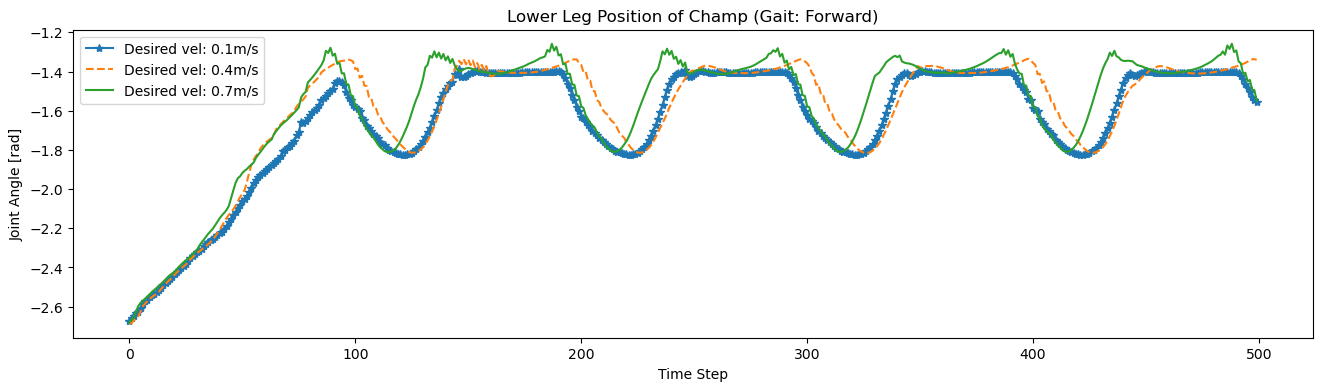

In [238]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,2],'-*',label="Desired vel: 0.1m/s")
plt.plot(emptyWorldFrame_4_f.values[0:500,2], '--',label="Desired vel: 0.4m/s")
plt.plot(emptyWorldFrame_7_f.values[0:500,2], label="Desired vel: 0.7m/s")
plt.legend()
plt.title("Lower Leg Position of Champ (Gait: Forward)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")

Text(0, 0.5, 'Joint Anglular Vel [rad/s]')

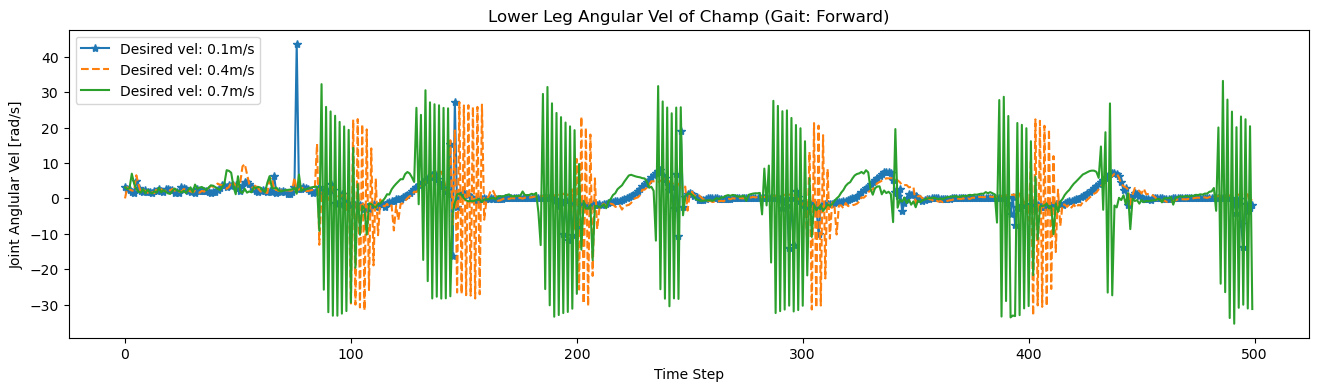

In [239]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,3],'-*',label="Desired vel: 0.1m/s")
plt.plot(emptyWorldFrame_4_f.values[0:500,3], '--',label="Desired vel: 0.4m/s")
plt.plot(emptyWorldFrame_7_f.values[0:500,3], label="Desired vel: 0.7m/s")
plt.legend()
plt.title("Lower Leg Angular Vel of Champ (Gait: Forward)")
plt.xlabel("Time Step")
plt.ylabel("Joint Anglular Vel [rad/s]")

## Gait Patterns

Text(0, 0.5, 'Joint Angle [rad]')

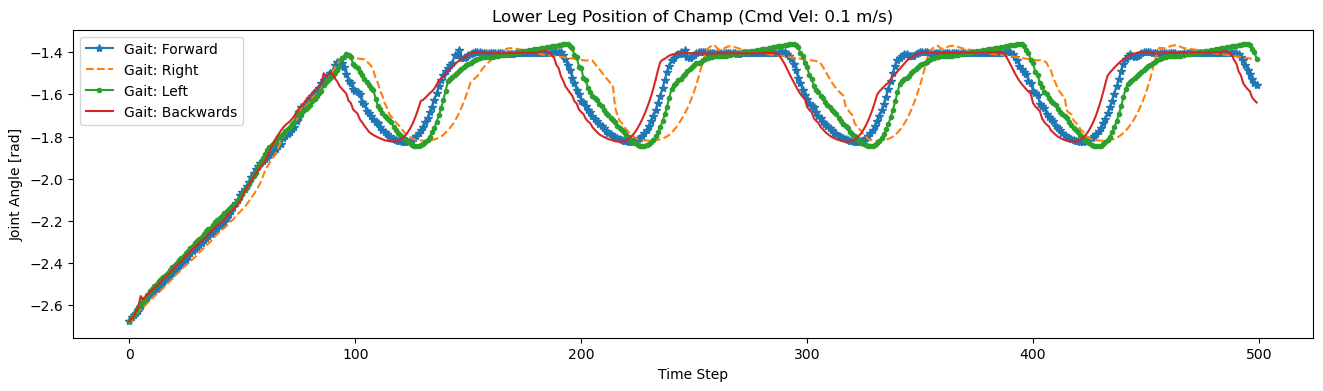

In [240]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,2],'-*',label="Gait: Forward")
plt.plot(emptyWorldFrame_1_r.values[0:500,2], '--',label="Gait: Right")
plt.plot(emptyWorldFrame_1_l.values[0:500,2], '.-',label="Gait: Left")
plt.plot(emptyWorldFrame_1_b.values[0:500,2],label="Gait: Backwards")
plt.legend()
plt.title("Lower Leg Position of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")

Text(0, 0.5, 'Joint Angle [rad]')

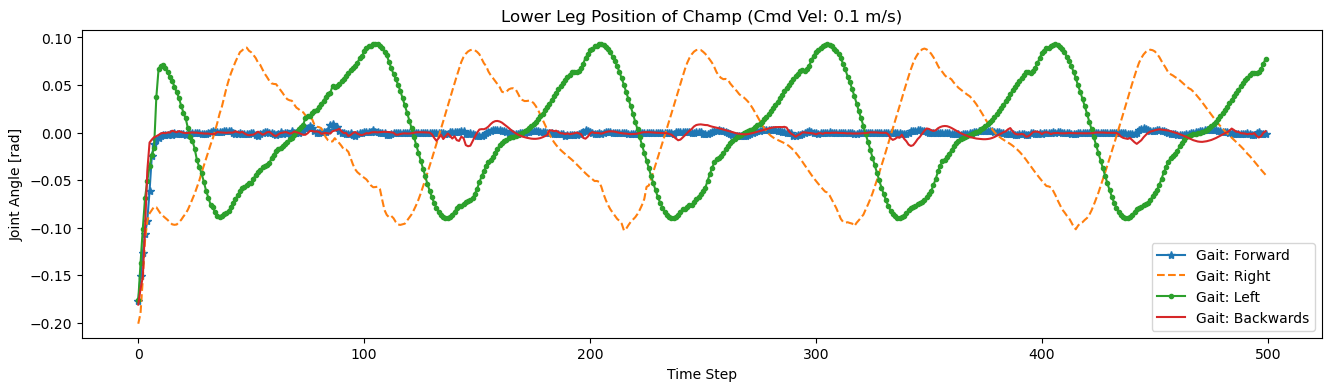

In [241]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,0],'-*',label="Gait: Forward")
plt.plot(emptyWorldFrame_1_r.values[0:500,0], '--',label="Gait: Right")
plt.plot(emptyWorldFrame_1_l.values[0:500,0], '.-',label="Gait: Left")
plt.plot(emptyWorldFrame_1_b.values[0:500,0], label="Gait: Backwards")
plt.legend()
plt.title("Lower Leg Position of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")

## Ground Parameters

### Varying $k_p$

(100.0, 500.0)

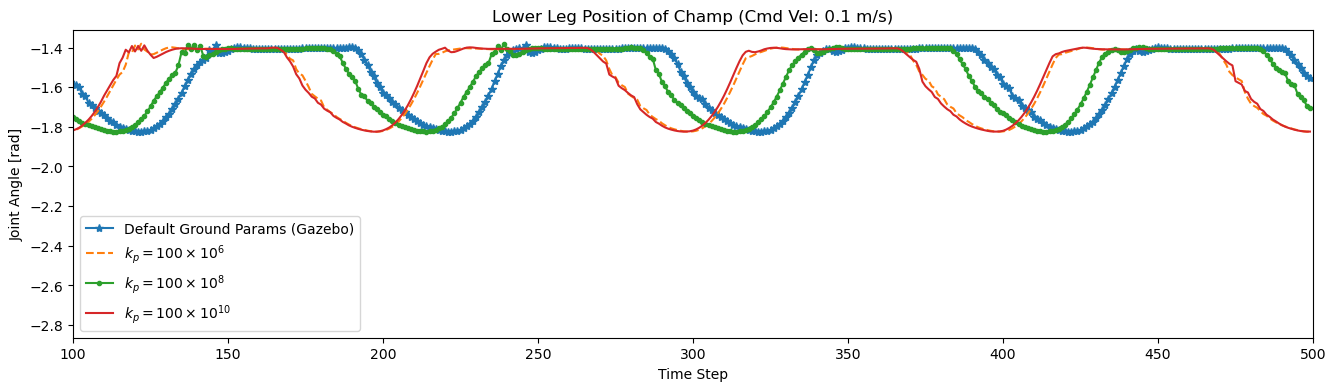

In [242]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,2],'-*',label="Default Ground Params (Gazebo)")
plt.plot(kp_100e6_kd_0_Frame_1_f.values[0:500,2], '--',label=r"$k_p = 100\times10^6$")
plt.plot(kp_100e8_kd_0_Frame_1_f.values[0:500,2], '.-',label=r"$k_p = 100\times10^8$")
plt.plot(kp_100e10_kd_0_Frame_1_f.values[0:500,2], label=r"$k_p = 100\times10^{10}$")
plt.legend()
plt.title("Lower Leg Position of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")
plt.xlim([100,500])

(100.0, 500.0)

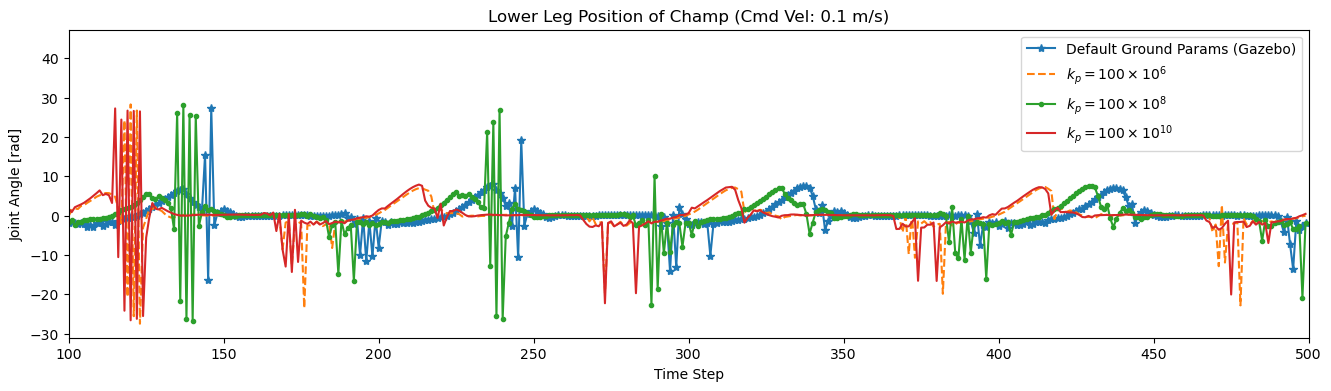

In [243]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,3],'-*',label="Default Ground Params (Gazebo)")
plt.plot(kp_100e6_kd_0_Frame_1_f.values[0:500,3], '--',label=r"$k_p = 100\times10^6$")
plt.plot(kp_100e8_kd_0_Frame_1_f.values[0:500,3], '.-',label=r"$k_p = 100\times10^8$")
plt.plot(kp_100e10_kd_0_Frame_1_f.values[0:500,3], label=r"$k_p = 100\times10^{10}$")
plt.legend()
plt.title("Lower Leg Position of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")
plt.xlim([100,500])

### Varying $k_d$

(100.0, 500.0)

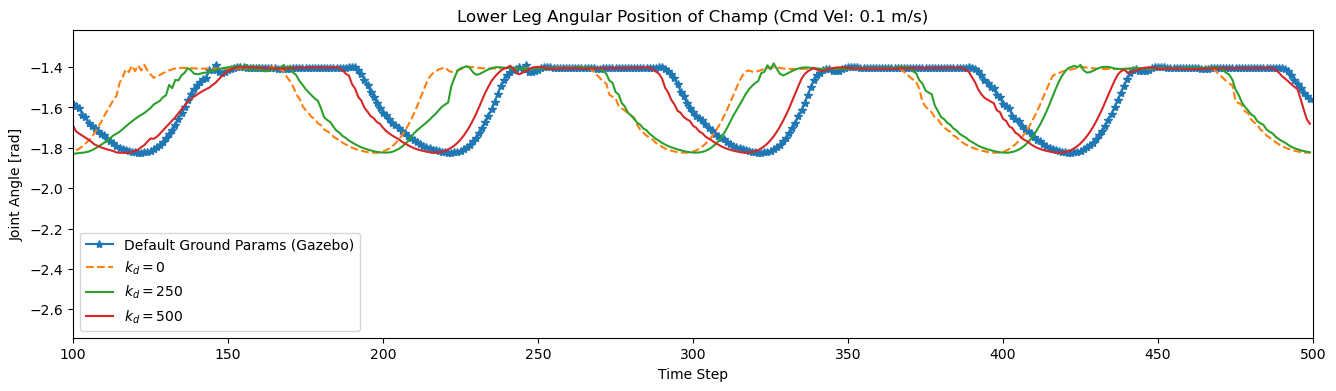

In [246]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,2],'-*',label="Default Ground Params (Gazebo)")
plt.plot(kp_100e10_kd_0_Frame_1_f.values[0:500,2], '--',label=r"$k_d = 0$")
#plt.plot(kp_100e10_kd_100_Frame_1_f.values[0:500,2], '.-',label=r"$k_d = 100$")
plt.plot(kp_100e10_kd_250_Frame_1_f.values[0:500,2], label=r"$k_d = 250$")
plt.plot(kp_100e10_kd_500_Frame_1_f.values[0:500,2], label=r"$k_d = 500$")
plt.legend()
plt.title("Lower Leg Angular Position of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")
plt.xlim([100,500])

(100.0, 500.0)

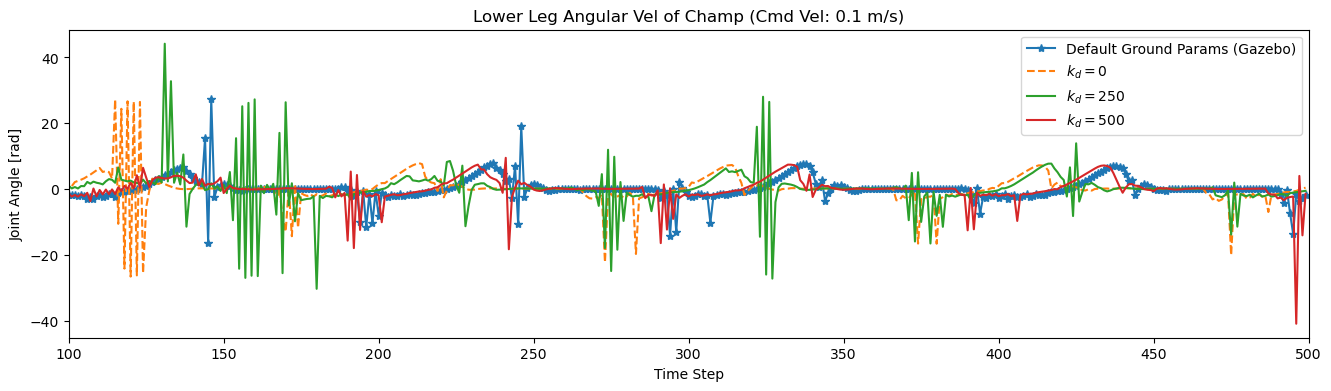

In [247]:
plt.figure(figsize=(16,4))
plt.plot(emptyWorldFrame_1_f.values[0:500,3],'-*',label="Default Ground Params (Gazebo)")
plt.plot(kp_100e10_kd_0_Frame_1_f.values[0:500,3], '--',label=r"$k_d = 0$")
#plt.plot(kp_100e10_kd_100_Frame_1_f.values[0:500,3], '.-',label=r"$k_d = 100$")
plt.plot(kp_100e10_kd_250_Frame_1_f.values[0:500,3], label=r"$k_d = 250$")
plt.plot(kp_100e10_kd_500_Frame_1_f.values[0:500,3], label=r"$k_d = 500$")
plt.legend()
plt.title("Lower Leg Angular Vel of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")
plt.xlim([100,500])

## Terrain

(100.0, 500.0)

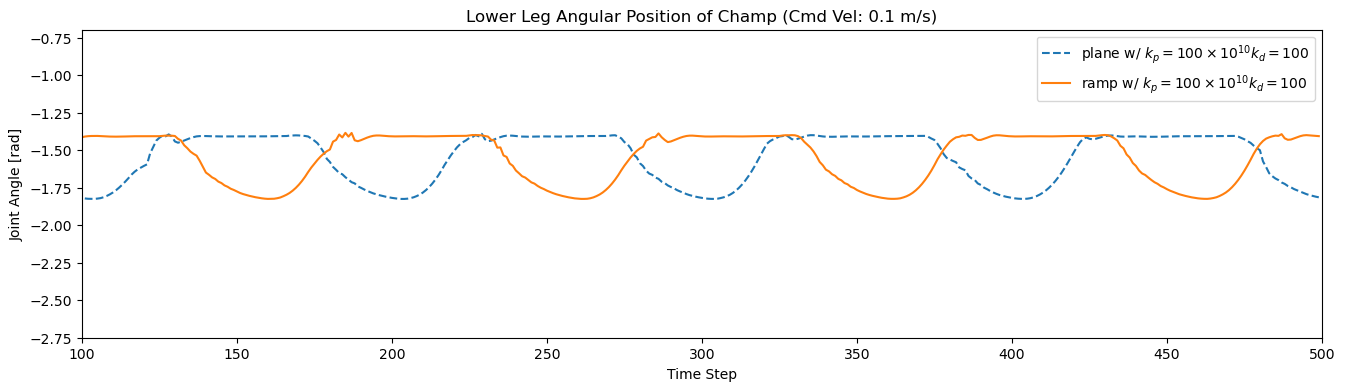

In [253]:
plt.figure(figsize=(16,4))
plt.plot(kp_100e10_kd_100_Frame_1_f.values[0:500,2], '--',label=r"plane w/ $k_p = 100\times10^{10} k_d = 100$")
plt.plot(ramp_kp_100e10_kd_100_Frame_1_f.values[0:500,2], label=r"ramp w/ $k_p = 100\times10^{10} k_d = 100$")
plt.legend()
plt.title("Lower Leg Angular Position of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")
plt.xlim([100,500])

(100.0, 500.0)

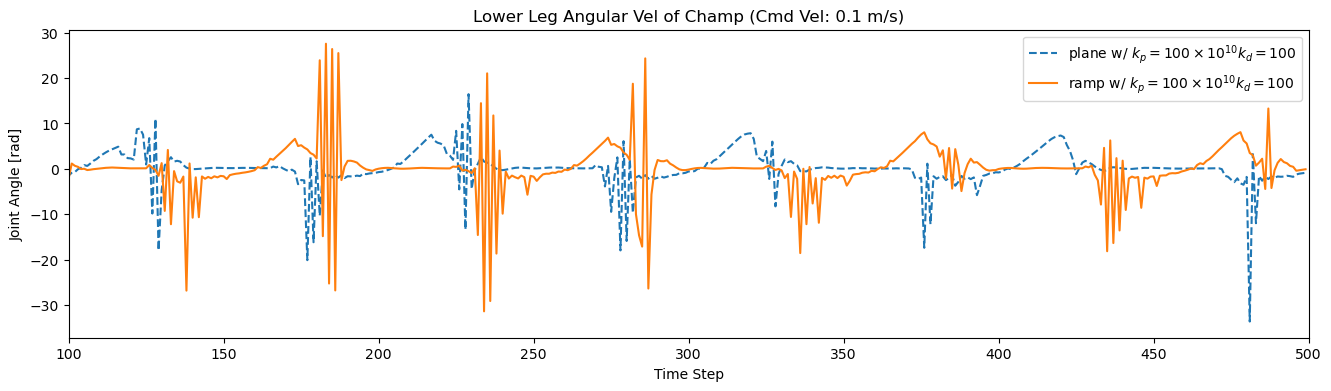

In [254]:
plt.figure(figsize=(16,4))
plt.plot(kp_100e10_kd_100_Frame_1_f.values[0:500,3], '--',label=r"plane w/ $k_p = 100\times10^{10} k_d = 100$")
plt.plot(ramp_kp_100e10_kd_100_Frame_1_f.values[0:500,3], label=r"ramp w/ $k_p = 100\times10^{10} k_d = 100$")
plt.legend()
plt.title("Lower Leg Angular Vel of Champ (Cmd Vel: 0.1 m/s)")
plt.xlabel("Time Step")
plt.ylabel("Joint Angle [rad]")
plt.xlim([100,500])